In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [5]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
#loading the dataset 
rentdata=pd.read_csv("House_Rent_Dataset.csv")
rentdata.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [8]:
#structure of the data
rentdata.shape

(4746, 12)

In [9]:
#checking datatypes
rentdata.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [10]:
#converting variables to integers
rentdata[['BHK','Rent','Size','Bathroom']] = rentdata[['BHK','Rent','Size','Bathroom']].astype(int)

In [11]:
#checking missing values
rentdata.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [12]:
#checking duplicated values
rentdata.duplicated().sum()

0

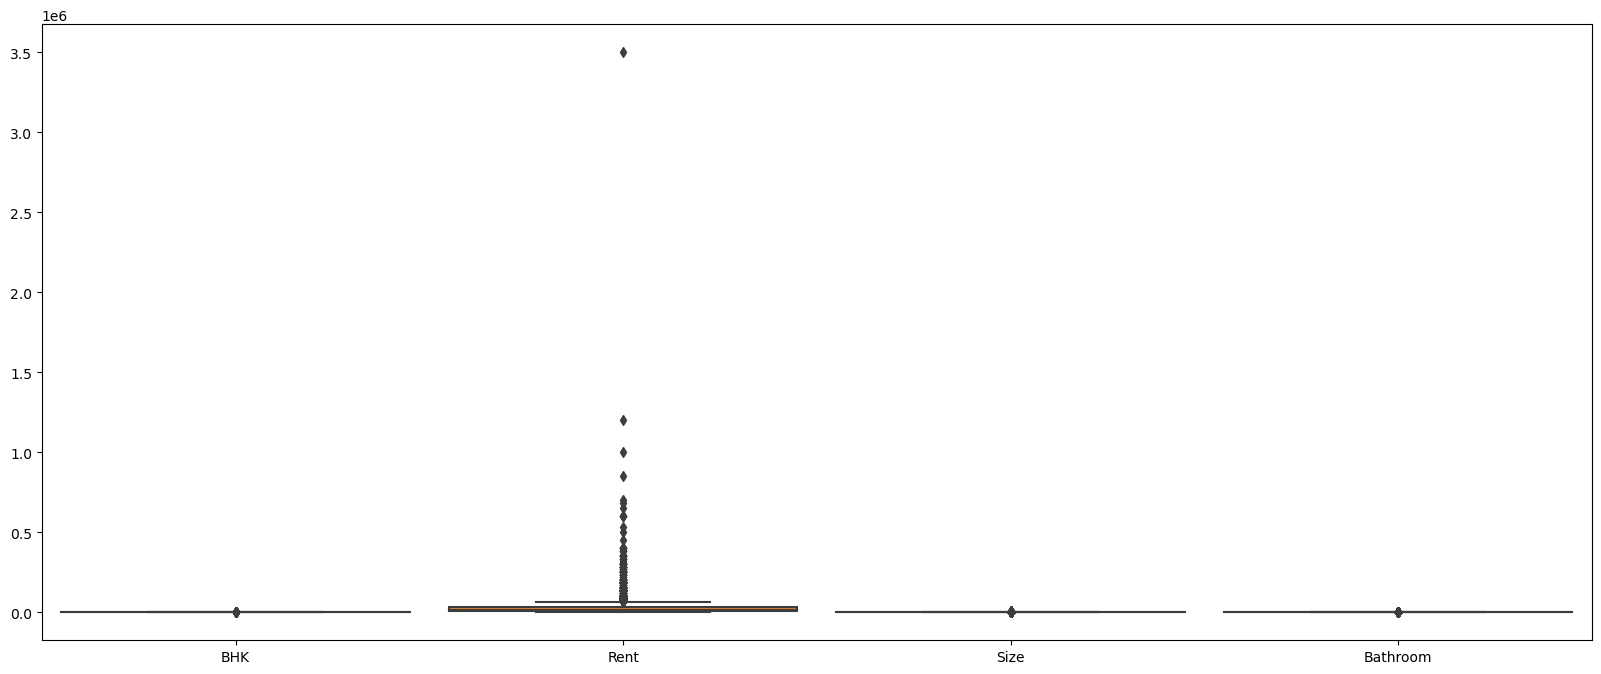

In [13]:
# looking for outliers using box plot

plt.figure(figsize = (20, 8))
sns.boxplot(data = rentdata, width = 0.9)
plt.show()

<AxesSubplot:xlabel='BHK'>

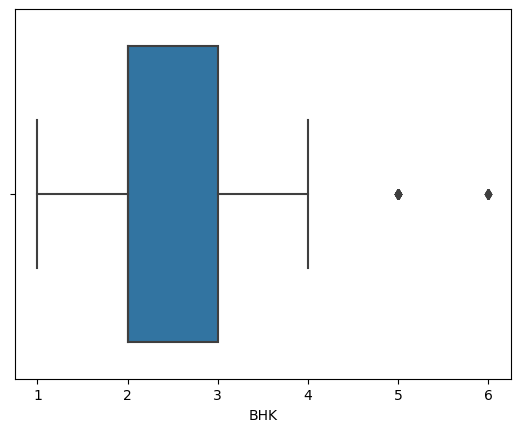

In [14]:
sns.boxplot(x="BHK",data=rentdata)

In [15]:
rentdata.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [16]:
rentdata["Area Locality"].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [17]:
#Describe data
rentdata.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [18]:
#correlation matrices
rentdata.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


In [19]:
rentdata["Area Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

Visualizing Categorical Variables

<AxesSubplot:xlabel='City', ylabel='Rent'>

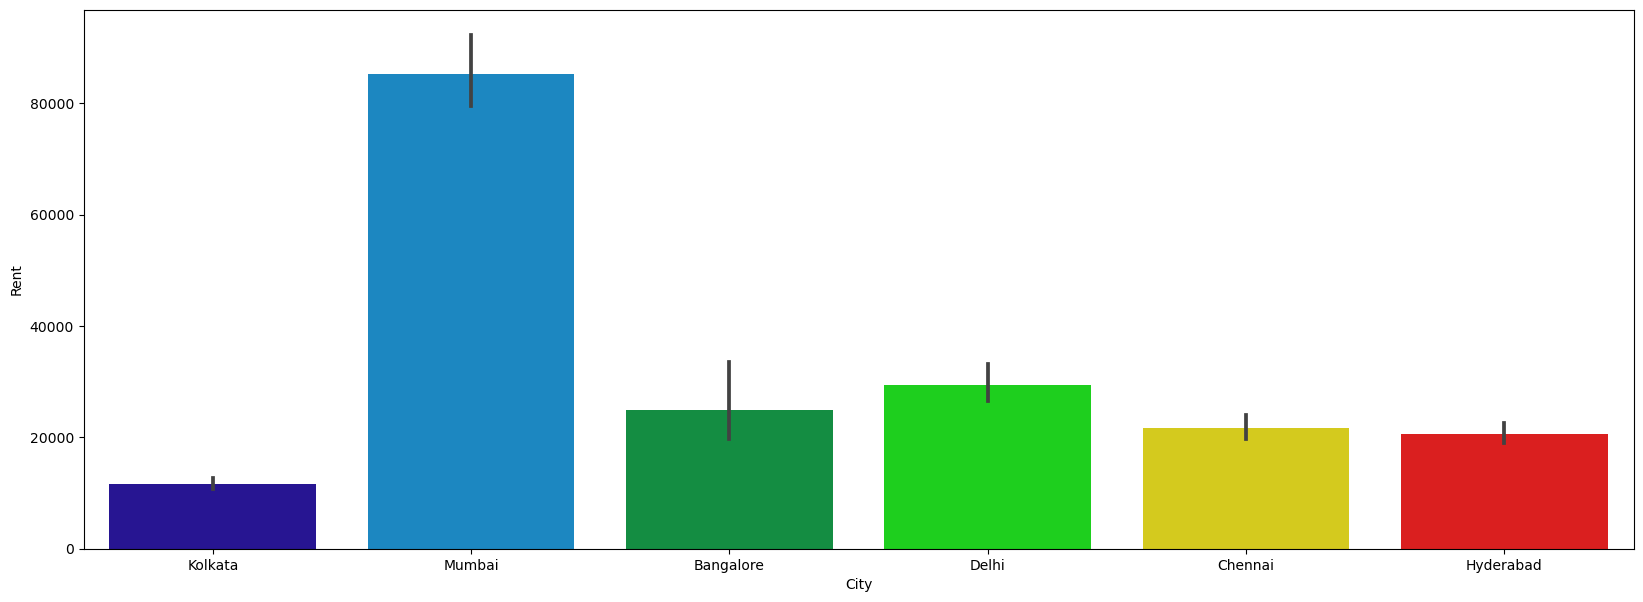

In [20]:
plt.figure(figsize = (20, 7))
sns.barplot(x = rentdata["City"], y = rentdata["Rent"], palette = "nipy_spectral")

C:\Users\Navya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area Type', ylabel='count'>

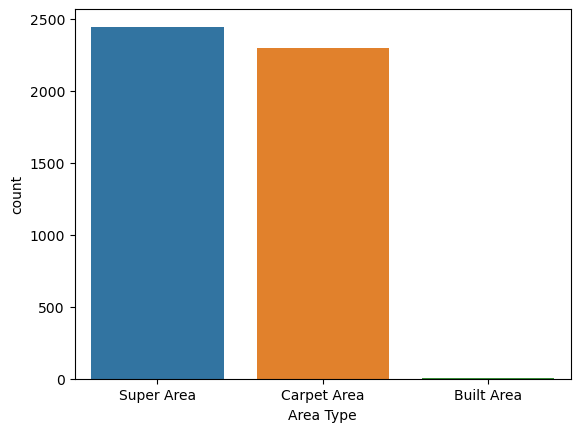

In [21]:
#Countplot Area Type
sns.countplot("Area Type",data=rentdata)

C:\Users\Navya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Furnishing Status', ylabel='count'>

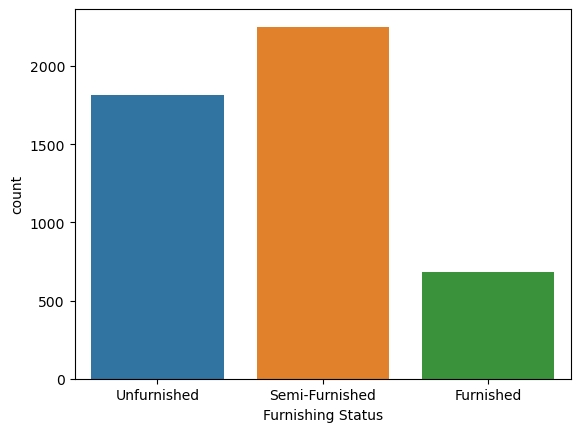

In [22]:
#Countplot Furnishing Status
sns.countplot("Furnishing Status",data=rentdata)

Visulaizing numerical variables

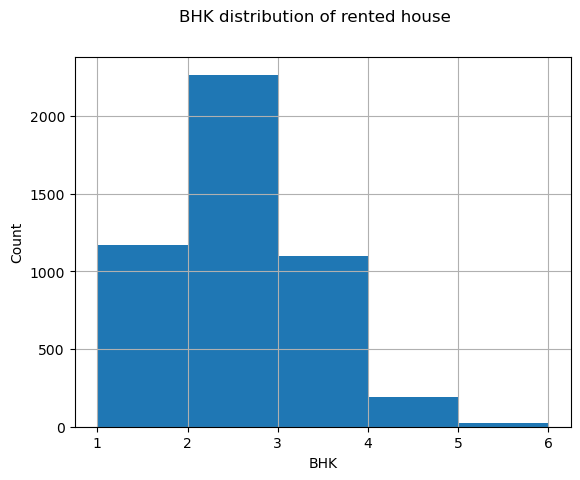

In [23]:
#BHK Distribution
rentdata['BHK'].hist(bins=5)
plt.suptitle('BHK distribution of rented house')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

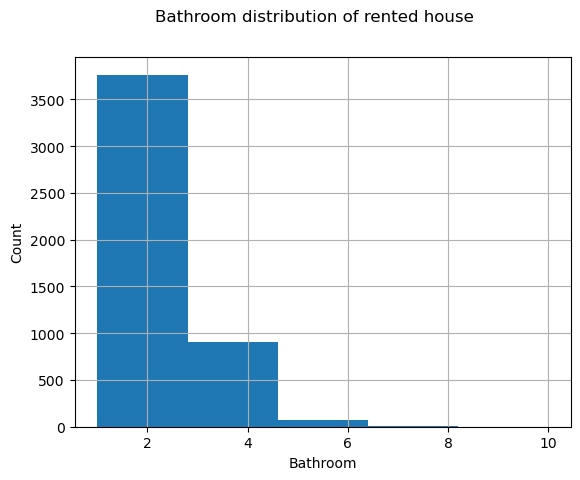

In [24]:
#Bathroom Distribution
rentdata['Bathroom'].hist(bins=5)
plt.suptitle('Bathroom distribution of rented house')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.show()

In [25]:
#encoding
rentdata2 = rentdata.join(pd.get_dummies(rentdata[['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']], drop_first=True))
rentdata2.drop(columns = ['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact'], inplace = True)
rentdata.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


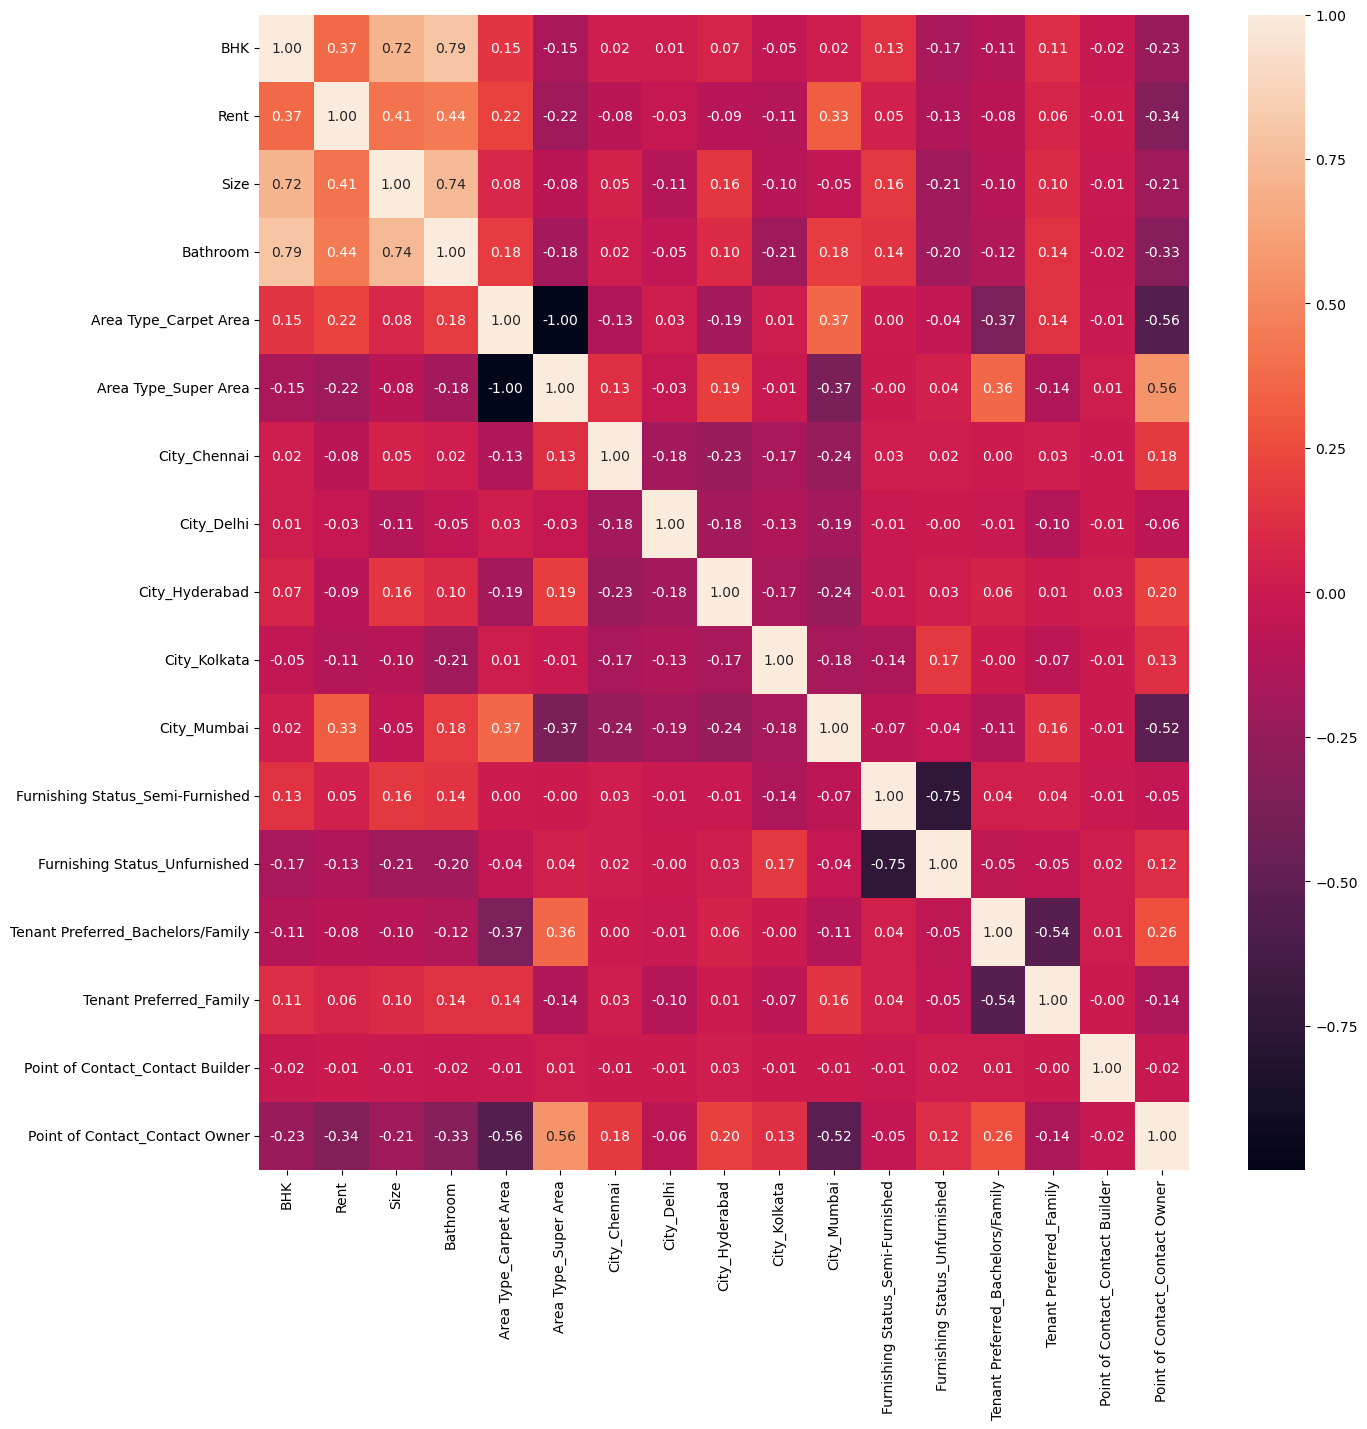

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(rentdata2.corr(),annot=True,fmt='.2f')
plt.show()

Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
X1 = rentdata.drop(['Rent'],axis=1)
y = rentdata['Rent']

In [28]:
X2 = X1.select_dtypes('O')

for col in X2.columns:
    lb = LabelEncoder()
    X1[col] = lb.fit_transform(X2[col].values)
X1

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,1100,455,2,221,4,2,1,2,2
1,21,2,800,14,2,1527,4,1,1,1,2
2,24,2,1000,14,2,1760,4,1,1,1,2
3,73,2,800,10,2,526,4,2,1,1,2
4,17,2,850,10,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,26,2,1000,271,1,219,3,1,1,2,2
4742,23,3,2000,16,2,1214,3,1,1,3,2
4743,79,3,1750,271,1,724,3,1,1,3,0
4744,75,3,1500,226,1,590,3,1,2,2,0


Data Splitting

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X1, y)

In [31]:
#Random Forest Regression Model
random_forest_model=RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
print("Random Forest Training Accuracy:", random_forest_model.score(X_train,y_train))
print("Random Forest Testing Accuracy:", random_forest_model.score(X_test,y_test))

Random Forest Training Accuracy: 0.912498472225255
Random Forest Testing Accuracy: 0.6734553324757672


In [43]:
#Gradient Boost Model
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
print("Gradient Boost Training Accuracy:", gb_model.score(X_train,y_train))
print("Gradient Boost Testing Accuracy:", gb_model.score(X_test,y_test))

Gradient Boost Training Accuracy: 0.7802205733387407
Gradient Boost Testing Accuracy: 0.49203654267837604


In [33]:
from sklearn.linear_model import Lasso, LassoCV
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

C:\Users\Navya\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100000, normalize=True)

In [34]:
alpha = lasso_cv.alpha_
alpha
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=7.743305719012128)

In [35]:
print("Lasso Regresion Training Accuracy:", lasso.score(X_train, y_train))
print("Lasso REgression Testing Accuracy:", lasso.score(X_test,y_test))

Lasso Regresion Training Accuracy: 0.24824710001932182
Lasso REgression Testing Accuracy: 0.46866995313489535


Model Evalutaion

In [36]:
def evaluate(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred))

In [37]:
evaluate(RandomForestRegressor())

MAE: 11763.328904802021
RMSE: 31505.874972719674
R2 Score: 0.6816037741709156


In [44]:
evaluate(GradientBoostingRegressor())

MAE: 13269.82100156795
RMSE: 39702.565256313275
R2 Score: 0.49438266280048837


In [39]:
lasso.score(X_test, y_test)

0.46866995313489535

In [40]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [41]:
print(adj_r2(X_train, y_train, lasso))

0.24591575468529658


In [42]:
print(adj_r2(X_test, y_test, lasso))

0.46369579950466877
